<!-- Create a Markdown explanation of how the perceptron works and create a model for clasification -->
# Single Neuron Model

## Introduction

The perceptron is a model of a single neuron. It is a linear classifier that can be used to classify data into two classes. It is a binary classifier. It is a simple model that can be used to understand larger neural networks. It is also a good model to understand the basics of machine learning.

## The Model

The perceptron is a model of a single neuron. It takes in a vector of inputs and produces a single output. The inputs are multiplied by weights and summed together. The sum is then passed through an activation function. The activation function determines the output of the neuron. The output is either 0 or 1. The activation function is a step function. If the sum is greater than a threshold, the output is 1. If the sum is less than the threshold, the output is 0. The threshold is a parameter of the model. The weights are also parameters of the model. The weights are adjusted during training. The weights are adjusted to minimize the error of the model. The error is the difference between the output of the model and the desired output. The desired output is the correct classification of the input. The perceptron is a linear classifier. It can only classify data that is linearly separable. The perceptron is a simple model that can be used to understand larger neural networks. It is also a good model to understand the basics of machine learning.

[perceptron]: https://en.wikipedia.org/wiki/Perceptron

## Setps in a Single Neuron Model

1. Initialize the weights to random values.
2. Calculate the output of the model.
3. Calculate the error of the model.
4. Adjust the weights to minimize the error.
5. Repeat steps 2-4 until the error is minimized.

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
import seaborn as sns

# don't show warnings
import warnings
warnings.filterwarnings("ignore")

# Get the data from Breast Cancer Wisconsin (Diagnostic) Dataset (WBCD)
# load the data from internet
from sklearn.datasets import load_breast_cancer
X = load_breast_cancer().data
y = load_breast_cancer().target

# Show description of the data
print(load_breast_cancer().DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [21]:
# create a dataframe with the data and the target
df = pd.DataFrame(X, columns=load_breast_cancer().feature_names)

# Add the target to the dataframe, with the targetname as column name
df['target'] = load_breast_cancer().target_names[load_breast_cancer().target]

# Show the first 5 rows of the dataframe
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,malignant
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,benign


In [24]:
# Show some statistics of the data
df.describe()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


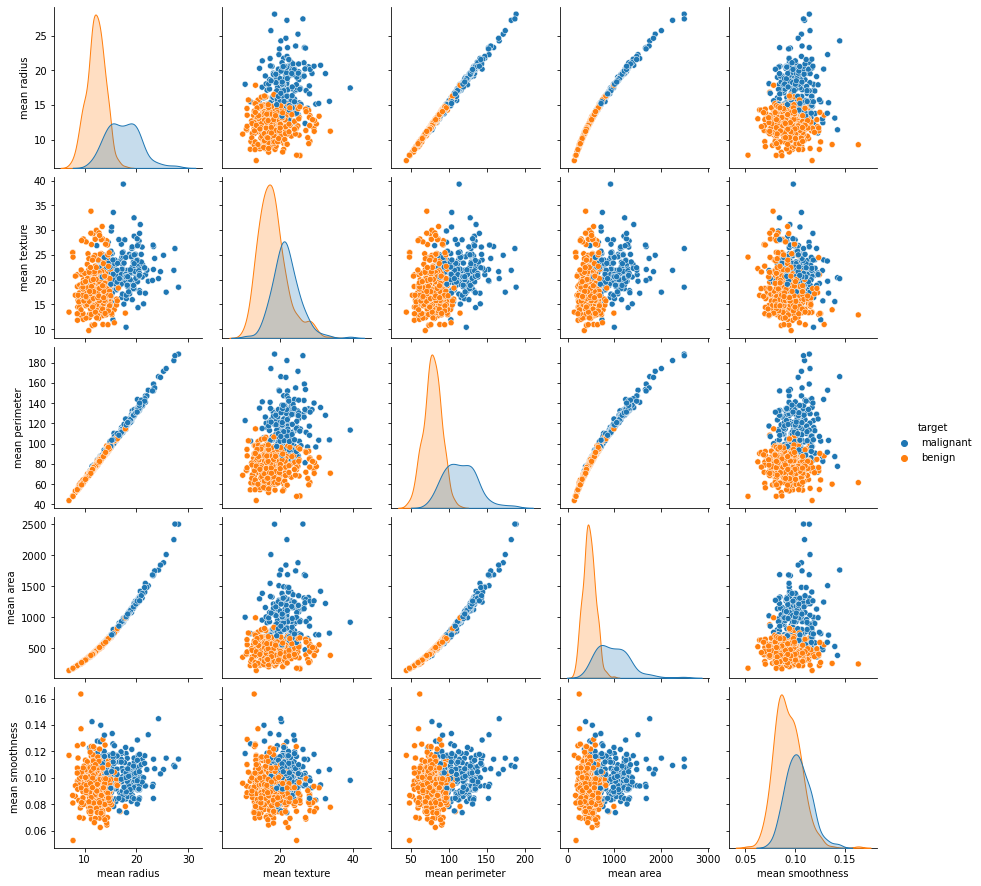

In [44]:
# Show a multigraph of the data
sns.pairplot(df, hue='target', vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'])

In [27]:
# Create a perceptron classifier class

class Perceptron(object):
    """Perceptron classifier.
    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int  (epochs)
        Passes over the training dataset.
    random_state : int
        Random number generator seed for random weight
        initialization.
    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
    """
    # Constructor
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        # Initialize the learning rate, the number of epochs and the random state
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    # Fit method
    def fit(self, X, y):
        """Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features] (n_samples = number of samples, n_features = number of features)
            Training vectors, where n_samples is the number of
            samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.
        Returns
        -------
        self : object
        """
        # Initialize the random state
        rgen = np.random.RandomState(self.random_state)
        # Initialize the weights with random numbers
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        # Initialize the errors list
        self.errors_ = []

        # For every epoch
        for _ in range(self.n_iter):
            errors = 0
            # For every sample in the dataset
            for xi, target in zip(X, y):
                # Calculate the update
                update = self.eta * (target - self.predict(xi))
                # Update the weights
                self.w_[1:] += update * xi
                self.w_[0] += update
                # Update the errors
                errors += int(update != 0.0)
            # Append the errors to the errors list
            self.errors_.append(errors)
        return self

    # Net input method
    def net_input(self, X):
        """Calculate net input"""
        # Calculate the dot product of the weights and the input
        return np.dot(X, self.w_[1:]) + self.w_[0]

    # Predict method
    def predict(self, X):
        """Return class label after unit step"""
        # Return the predicted class
        return np.where(self.net_input(X) >= 0.0, 1, -1)

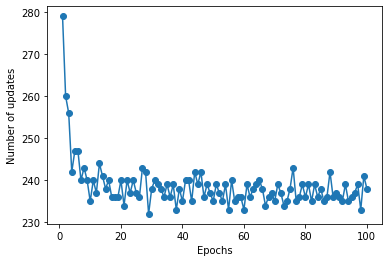

In [29]:
# Create a perceptron object
ppn = Perceptron(eta=0.01, n_iter=100)

# Fit the perceptron object with the data
ppn.fit(X, y)

# Plot the errors
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [41]:
# Show a confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = ppn.predict(X)
confusion_matrix(y, y_pred)

array([[  0, 212],
       [  0, 357]], dtype=int64)

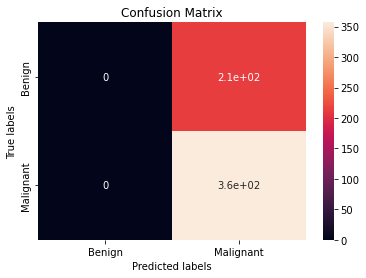

In [42]:
# Plot the confusion matrix in a heatmap
ax = plt.subplot()
sns.heatmap(confusion_matrix(y, y_pred), annot=True, ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Benign', 'Malignant'])
ax.yaxis.set_ticklabels(['Benign', 'Malignant'])
plt.show()